# 🔍 Partial Least Squares (PLS) Regression

## What is PLS Regression?

**Partial Least Squares (PLS)** is a dimensionality reduction technique that, like PCR, creates new components from predictors. However, unlike PCA, **PLS constructs components that maximize covariance with the response variable** — not just variance in the predictors.

---

### ✅ Why Use PLS?

- Works well when predictors are **highly collinear**
- Better than PCR when your goal is **prediction**
- PLS components are influenced by both X and y

---

### 🧮 Steps in PLS

1. Standardize the predictors and response.
2. Construct latent components that explain both predictor variance and response covariance.
3. Use these components in a linear regression model.

PLS is especially useful when the number of predictors is large relative to the number of observations.


## 🧩 Inputs:
- $ \mathbf{X} \in \mathbb{R}^{n \times p} $: predictors
- $ \mathbf{y} \in \mathbb{R}^n $: response
- Choose number of components $ K $

---

## 🧮 Algorithm (PLS1 — single response)

Repeat for $ k = 1, 2, ..., K $:

### Step 1. Compute weight vector $ \mathbf{w}_k $
Find direction that maximizes covariance between projected predictor and response:
$$
\mathbf{w}_k = \arg\max_{\|\mathbf{w}\|=1} \text{Cov}(\mathbf{X} \mathbf{w}, \mathbf{y})^2
$$
Compute:
$$
\mathbf{w}_k \propto \mathbf{X}^\top \mathbf{y}
$$

### Step 2. Compute latent score $ \mathbf{t}_k $
$$
\mathbf{t}_k = \mathbf{X} \mathbf{w}_k
$$

### Step 3. Compute loading $ \mathbf{p}_k $
$$
\mathbf{p}_k = \frac{\mathbf{X}^\top \mathbf{t}_k}{\mathbf{t}_k^\top \mathbf{t}_k}
$$

### Step 4. Compute regression coefficient for $ \mathbf{y} $
$$
q_k = \frac{\mathbf{y}^\top \mathbf{t}_k}{\mathbf{t}_k^\top \mathbf{t}_k}
$$

### Step 5. Deflate $ \mathbf{X} $ and $ \mathbf{y} $
$$
\mathbf{X} \leftarrow \mathbf{X} - \mathbf{t}_k \mathbf{p}_k^\top
$$
$$
\mathbf{y} \leftarrow \mathbf{y} - q_k \mathbf{t}_k
$$


## ✅ Final Model

Construct matrix of latent components:
$$
\mathbf{T} = [\mathbf{t}_1, \dots, \mathbf{t}_K]
$$
Then regress:
$$
\hat{\mathbf{y}} = \mathbf{T} \mathbf{q}
$$


## Simulated data 

PLS R²: 0.4027978169857983
PLS MSE: 0.6346175580711939


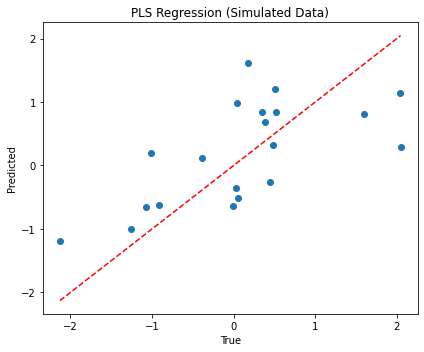

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Simulate multicollinear data
np.random.seed(0)
n_samples, n_features = 100, 10
X = np.random.rand(n_samples, n_features)
X[:, 1] = X[:, 0] + np.random.normal(0, 0.01, size=n_samples)
true_beta = np.array([1, 1] + [0] * (n_features - 2))
y = X @ true_beta + np.random.normal(0, 0.6, size=n_samples)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = StandardScaler().fit_transform(y.reshape(-1, 1)).ravel()

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=0)

# Fit PLS with 2 components
pls = PLSRegression(n_components=2)
pls.fit(X_train, y_train)
y_pred = pls.predict(X_test).ravel()

# Evaluation
print("PLS R²:", r2_score(y_test, y_pred))
print("PLS MSE:", mean_squared_error(y_test, y_pred))

# Plot predicted vs true
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True")
plt.ylabel("Predicted")
plt.title("PLS Regression (Simulated Data)")
plt.tight_layout()
plt.show()


PLS R² (real): 0.5950157947882988
PLS MSE (real): 0.3965912062904475


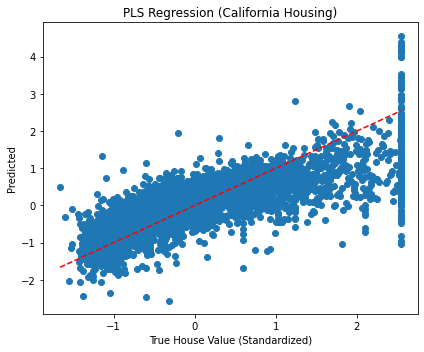

In [3]:
from sklearn.datasets import fetch_california_housing

# Load data
data = fetch_california_housing()
X_real = data.data
y_real = data.target
feature_names = data.feature_names

# Standardize
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled_real = scaler_X.fit_transform(X_real)
y_scaled_real = scaler_y.fit_transform(y_real.reshape(-1, 1)).ravel()

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_real, y_scaled_real, test_size=0.2, random_state=0)

# Fit PLS with 6 components
pls_real = PLSRegression(n_components=6)
pls_real.fit(X_train, y_train)
y_pred_real = pls_real.predict(X_test).ravel()

# Evaluate
print("PLS R² (real):", r2_score(y_test, y_pred_real))
print("PLS MSE (real):", mean_squared_error(y_test, y_pred_real))

# Plot
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_real)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True House Value (Standardized)")
plt.ylabel("Predicted")
plt.title("PLS Regression (California Housing)")
plt.tight_layout()
plt.show()
